# Divvy Bike Usage Prediction - Exploratory Data Analysis

**Project:** Prédiction de l'utilisation des vélos Divvy à Chicago  
**Author:** Noé  
**Date:** 2026-01-13  
**Objective:** Analyser les données historiques 2024 pour comprendre les patterns d'utilisation

---

## Table of Contents

1. [Data Loading & Overview](#1-data-loading)
2. [Temporal Analysis](#2-temporal-analysis)
3. [Weather Impact](#3-weather-impact)
4. [Special Events & Holidays](#4-special-events)
5. [Data Quality Assessment](#5-data-quality)
6. [Key Findings & Next Steps](#6-findings)

---

## 1. Data Loading & Overview

Nous allons charger les trois sources de données principales:
- **Divvy trips 2024**: ~5.8M trajets de vélos
- **Weather data**: Conditions météorologiques Chicago 2024
- **Holidays**: Jours fériés US et événements spéciaux

In [31]:
# Import des bibliothèques essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from pathlib import Path

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully")

Libraries loaded successfully


In [32]:
# Définition des chemins
DATA_PATH = Path('../data')
RAW_PATH = DATA_PATH / 'raw'
DIVVY_PATH = RAW_PATH / 'divvy' / '2024'
WEATHER_PATH = RAW_PATH / 'weather'
HOLIDAYS_PATH = RAW_PATH / 'holidays'

print(f"Data path: {DATA_PATH.absolute()}")
print(f"Divvy path: {DIVVY_PATH.absolute()}")
print(f"Weather path: {WEATHER_PATH.absolute()}")
print(f"Holidays path: {HOLIDAYS_PATH.absolute()}")

Data path: c:\Users\noecr\Documents\Ynov\machine_learning\divvy-bike-usage-prediction\notebooks\..\data
Divvy path: c:\Users\noecr\Documents\Ynov\machine_learning\divvy-bike-usage-prediction\notebooks\..\data\raw\divvy\2024
Weather path: c:\Users\noecr\Documents\Ynov\machine_learning\divvy-bike-usage-prediction\notebooks\..\data\raw\weather
Holidays path: c:\Users\noecr\Documents\Ynov\machine_learning\divvy-bike-usage-prediction\notebooks\..\data\raw\holidays


### 1.1 Loading Divvy 2024 Data

In [33]:
# Charger tous les fichiers CSV Divvy 2024
divvy_files = sorted(DIVVY_PATH.glob('*.csv'))
print(f"Fichiers Divvy trouvés: {len(divvy_files)}")

# Charger et concaténer tous les mois
dfs = []
for file in divvy_files:
    print(f"  Loading {file.name}...", end=' ')
    df_month = pd.read_csv(file)
    print(f"{len(df_month):,} rows")
    dfs.append(df_month)

# Concaténer tous les mois
df_divvy = pd.concat(dfs, ignore_index=True)
print(f"\nTotal Divvy trips 2024: {len(df_divvy):,} rows")
print(f"Memory usage: {df_divvy.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Fichiers Divvy trouvés: 12
  Loading 202401-divvy-tripdata.csv... 144,873 rows
  Loading 202402-divvy-tripdata.csv... 223,164 rows
  Loading 202403-divvy-tripdata.csv... 301,687 rows
  Loading 202404-divvy-tripdata.csv... 415,025 rows
  Loading 202405-divvy-tripdata.csv... 609,493 rows
  Loading 202406-divvy-tripdata.csv... 710,721 rows
  Loading 202407-divvy-tripdata.csv... 748,962 rows
  Loading 202408-divvy-tripdata.csv... 755,639 rows
  Loading 202409-divvy-tripdata.csv... 821,276 rows
  Loading 202410-divvy-tripdata.csv... 616,281 rows
  Loading 202411-divvy-tripdata.csv... 335,075 rows
  Loading 202412-divvy-tripdata.csv... 178,372 rows

Total Divvy trips 2024: 5,860,568 rows
Memory usage: 3302.90 MB


In [34]:
# Aperçu des données Divvy
print("Divvy Data Overview:")
print(f"Shape: {df_divvy.shape}")
print(f"\nColumns: {df_divvy.columns.tolist()}")
print("\n" + "="*80)
df_divvy.head()

Divvy Data Overview:
Shape: (5860568, 13)

Columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member


In [35]:
# Info sur les types de données et valeurs manquantes
print("Divvy Data Info:")
df_divvy.info()

print("\nMissing Values:")
missing = df_divvy.isnull().sum()
missing_pct = (missing / len(df_divvy) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

Divvy Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860568 entries, 0 to 5860567
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 581.3+ MB

Missing Values:
                    Missing Count  Percentage
end_station_name          1104653       18.85
end_station_id            1104653       18.85
start_station_id          1073951       18.33
start_station_name        1073951       18.33
end_lat                      7232        0.12
end_lng                     

### 1.2 Loading Weather Data

In [36]:
# Charger les données météo 2024
df_weather = pd.read_csv(WEATHER_PATH / '2024_weather_chicago.csv')
print(f"Weather data loaded: {len(df_weather):,} rows")
print(f"\nColumns: {df_weather.columns.tolist()}")
print("\n" + "="*80)
df_weather.head()

Weather data loaded: 366 rows

Columns: ['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun']



,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2024-01-01 00:00:00,-1.0,-2.8,0.0,0.0,NaN,NaN,15.8,NaN,1025.8,NaN
1,2024-01-02 00:00:00,-0.5,-3.3,2.8,0.0,NaN,NaN,19.3,NaN,1021.6,NaN
2,2024-01-03 00:00:00,0.9,-0.6,2.2,0.0,NaN,NaN,11.0,NaN,1019.3,NaN
3,2024-01-04 00:00:00,-0.5,-3.3,1.7,0.0,NaN,NaN,7.1,NaN,1027.3,NaN
4,2024-01-05 00:00:00,-0.4,-4.4,2.8,0.0,NaN,NaN,7.6,NaN,1023.0,NaN


In [37]:
# Info sur les données météo
print("Weather Data Summary:")
df_weather.describe()

Weather Data Summary:


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,366.000000,366.000000,366.000000,214.000000,0.0,0.0,366.000000,0.0,366.000000,0.0
mean,12.297541,7.666120,16.819945,0.447196,NaN,NaN,12.654098,NaN,1016.294536,NaN
std,10.093490,9.691917,10.981477,2.405933,NaN,NaN,5.493381,NaN,7.029903,NaN
min,-21.000000,-23.300000,-16.700000,0.000000,NaN,NaN,2.700000,NaN,991.100000,NaN
25%,3.825000,0.725000,7.800000,0.000000,NaN,NaN,8.325000,NaN,1011.600000,NaN
50%,14.050000,8.300000,19.150000,0.000000,NaN,NaN,12.000000,NaN,1016.050000,NaN
75%,21.000000,15.450000,26.100000,0.000000,NaN,NaN,16.150000,NaN,1020.775000,NaN
max,30.400000,26.100000,35.600000,24.000000,NaN,NaN,29.700000,NaN,1038.800000,NaN


### 1.3 Loading Holidays Data

In [ ]:
# Charger les jours fériés
df_holidays = pd.read_csv(HOLIDAYS_PATH / 'us_holidays_2024_2025.csv')
df_holidays_2024 = df_holidays[df_holidays['date'].str.startswith('2024')]
print(f"Holidays loaded: {len(df_holidays_2024)} holidays in 2024")
print("\nJours fériés 2024:")
df_holidays_2024

Holidays loaded: 11 holidays in 2024

Jours fériés 2024:


,date,holiday_name,type
0,2024-01-01,New Year's Day,federal
1,2024-01-15,Martin Luther King Jr. Day,federal
2,2024-02-19,Washington's Birthday,federal
3,2024-05-27,Memorial Day,federal
4,2024-06-19,Juneteenth National Independence Day,federal
5,2024-07-04,Independence Day,federal
6,2024-09-02,Labor Day,federal
7,2024-10-14,Columbus Day,federal
8,2024-11-11,Veterans Day,federal
9,2024-11-28,Thanksgiving Day,federal


---

## 2. Temporal Analysis

Analysons les patterns temporels d'utilisation:
- Usage par heure de la journée
- Différences semaine vs weekend
- Tendances mensuelles et saisonnières

In [39]:
# Conversion des dates en format datetime (avec format ISO8601 pour gérer les millisecondes)
df_divvy['started_at'] = pd.to_datetime(df_divvy['started_at'], format='ISO8601')
df_divvy['ended_at'] = pd.to_datetime(df_divvy['ended_at'], format='ISO8601')

# Extraction des features temporelles
df_divvy['date'] = df_divvy['started_at'].dt.date
df_divvy['hour'] = df_divvy['started_at'].dt.hour
df_divvy['day_of_week'] = df_divvy['started_at'].dt.dayofweek  # 0=Lundi, 6=Dimanche
df_divvy['day_name'] = df_divvy['started_at'].dt.day_name()
df_divvy['month'] = df_divvy['started_at'].dt.month
df_divvy['month_name'] = df_divvy['started_at'].dt.month_name()
df_divvy['is_weekend'] = df_divvy['day_of_week'].isin([5, 6]).astype(int)
df_divvy['trip_duration_min'] = (df_divvy['ended_at'] - df_divvy['started_at']).dt.total_seconds() / 60

print("Temporal features created")
print(f"Data period: {df_divvy['started_at'].min()} → {df_divvy['started_at'].max()}")

Temporal features created
Data period: 2024-01-01 00:00:39 → 2024-12-31 23:56:49.854000


### 2.1 Hourly Usage Patterns

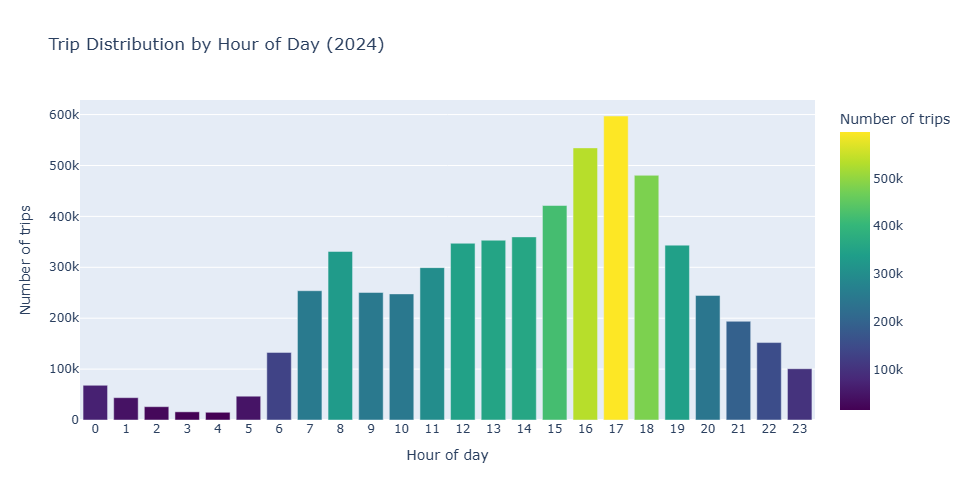


Hourly statistics:
Peak hour: 17:00
Lowest hour: 4:00


In [40]:
# Agrégation par heure
hourly_usage = df_divvy.groupby('hour').size().reset_index(name='trip_count')

# Visualisation interactive avec Plotly
fig = px.bar(hourly_usage, x='hour', y='trip_count',
             title='Trip Distribution by Hour of Day (2024)',
             labels={'hour': 'Hour of day', 'trip_count': 'Number of trips'},
             color='trip_count',
             color_continuous_scale='Viridis')

fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=0, dtick=1),
    height=500,
    hovermode='x unified'
)

fig.show()

# Stats
print("\nHourly statistics:")
print(f"Peak hour: {hourly_usage.loc[hourly_usage['trip_count'].idxmax(), 'hour']}:00")
print(f"Lowest hour: {hourly_usage.loc[hourly_usage['trip_count'].idxmin(), 'hour']}:00")

### 2.2 Weekday vs Weekend Comparison

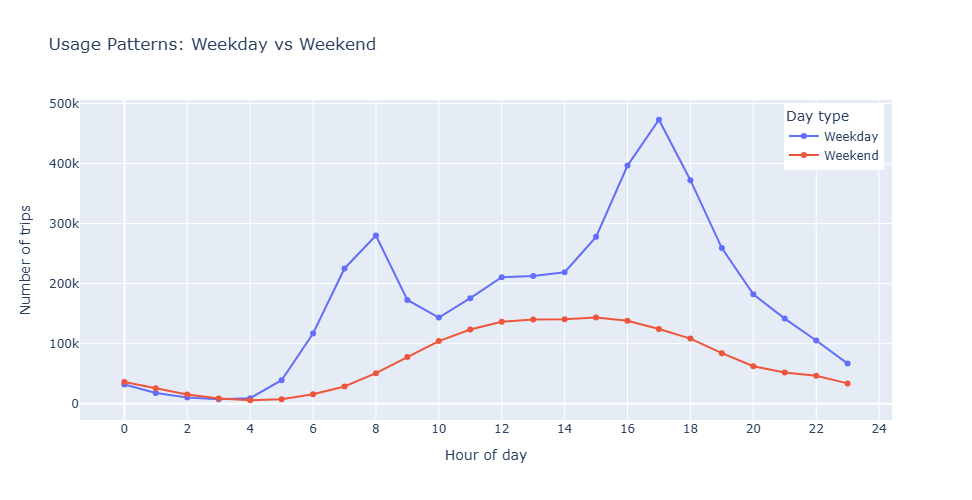


Weekday trips: 4,148,270 (70.8%)
Weekend trips: 1,712,298 (29.2%)


In [41]:
# Agrégation par heure et type de jour
hourly_by_daytype = df_divvy.groupby(['hour', 'is_weekend']).size().reset_index(name='trip_count')
hourly_by_daytype['day_type'] = hourly_by_daytype['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

# Visualisation comparative
fig = px.line(hourly_by_daytype, x='hour', y='trip_count', color='day_type',
              title='Usage Patterns: Weekday vs Weekend',
              labels={'hour': 'Hour of day', 'trip_count': 'Number of trips', 'day_type': 'Day type'},
              markers=True)

fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=0, dtick=2),
    height=500,
    hovermode='x unified',
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99)
)

fig.show()

# Stats comparatives
week_total = df_divvy[df_divvy['is_weekend']==0].shape[0]
weekend_total = df_divvy[df_divvy['is_weekend']==1].shape[0]
print(f"\nWeekday trips: {week_total:,} ({week_total/len(df_divvy)*100:.1f}%)")
print(f"Weekend trips: {weekend_total:,} ({weekend_total/len(df_divvy)*100:.1f}%)")

### 2.3 Usage by Day of Week

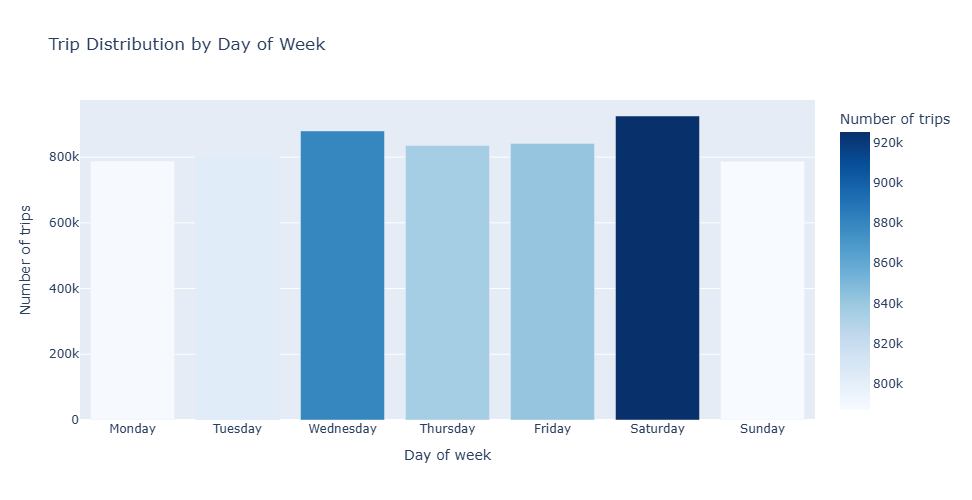

In [42]:
# Ordre des jours
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_usage = df_divvy.groupby('day_name').size().reindex(day_order).reset_index(name='trip_count')

# Visualisation
fig = px.bar(daily_usage, x='day_name', y='trip_count',
             title='Trip Distribution by Day of Week',
             labels={'day_name': 'Day of week', 'trip_count': 'Number of trips'},
             color='trip_count',
             color_continuous_scale='Blues')

fig.update_layout(height=500)
fig.show()

### 2.4 Monthly Trends

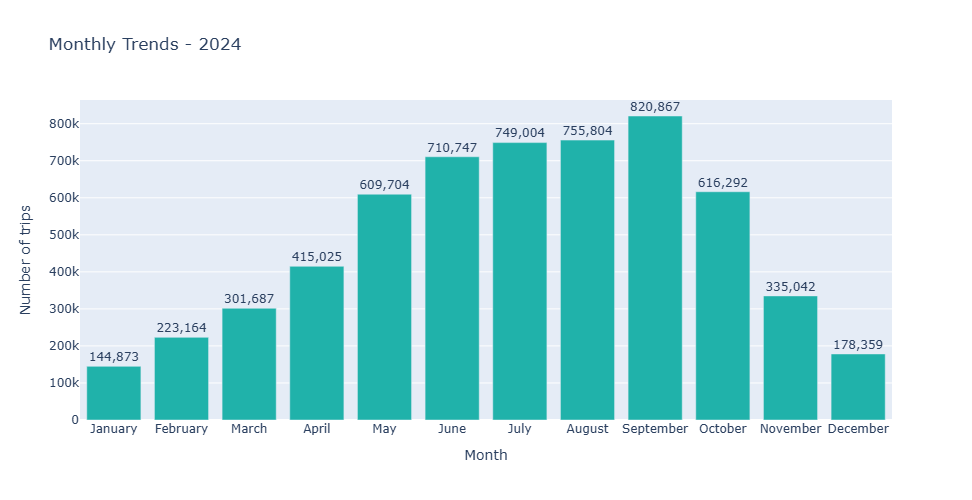


Most active month: September
Least active month: January


In [43]:
# Agrégation mensuelle
monthly_usage = df_divvy.groupby(['month', 'month_name']).size().reset_index(name='trip_count')
monthly_usage = monthly_usage.sort_values('month')

# Visualisation
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthly_usage['month_name'],
    y=monthly_usage['trip_count'],
    marker_color='lightseagreen',
    text=monthly_usage['trip_count'],
    texttemplate='%{text:,.0f}',
    textposition='outside'
))

fig.update_layout(
    title='Monthly Trends - 2024',
    xaxis_title='Month',
    yaxis_title='Number of trips',
    height=500,
    showlegend=False
)

fig.show()

# Stats saisonnières
print(f"\nMost active month: {monthly_usage.loc[monthly_usage['trip_count'].idxmax(), 'month_name']}")
print(f"Least active month: {monthly_usage.loc[monthly_usage['trip_count'].idxmin(), 'month_name']}")

### 2.5 Heatmap: Day × Hour

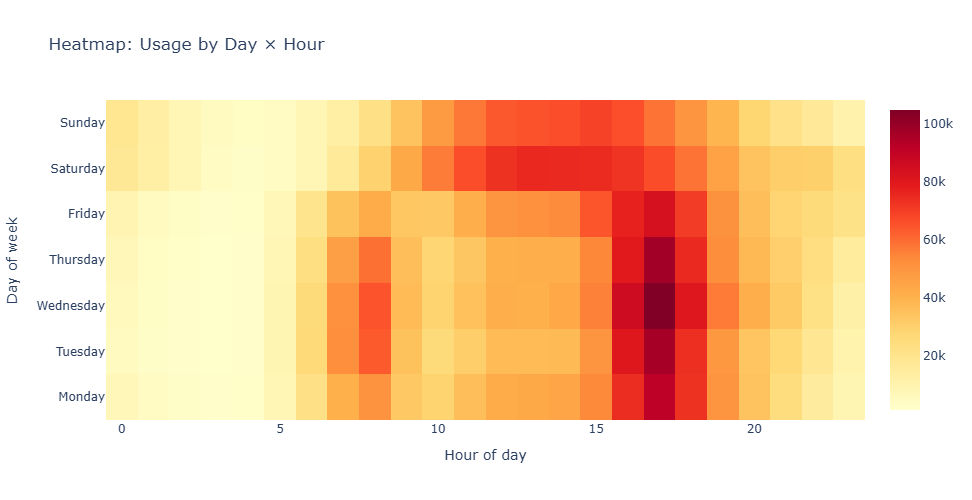

In [61]:
# Création de la matrice heure × jour
heatmap_data = df_divvy.groupby(['day_of_week', 'hour']).size().reset_index(name='trip_count')
heatmap_pivot = heatmap_data.pivot(index='day_of_week', columns='hour', values='trip_count')

# Renommer les jours
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot.index = day_labels

# Heatmap avec Plotly
fig = go.Figure(data=go.Heatmap(
    z=heatmap_pivot.values,
    x=heatmap_pivot.columns,
    y=heatmap_pivot.index,
    colorscale='YlOrRd',
    hovertemplate='Day: %{y}<br>Hour: %{x}:00<br>Trips: %{z:,.0f}<extra></extra>'
))

fig.update_layout(
    title='Heatmap: Usage by Day × Hour',
    xaxis_title='Hour of day',
    yaxis_title='Day of week',
    height=500
)

fig.show()

---

## 3. Weather Impact Analysis

Analysons l'impact des conditions météorologiques sur l'utilisation des vélos:
- Température
- Précipitations
- Vent
- Corrélations

In [45]:
# Préparation des données météo
df_weather['date'] = pd.to_datetime(df_weather['date']).dt.date

# Agrégation journalière des trajets Divvy
daily_trips = df_divvy.groupby('date').agg({
    'ride_id': 'count',
    'trip_duration_min': 'mean'
}).reset_index()
daily_trips.columns = ['date', 'trip_count', 'avg_duration']

# Merge avec les données météo
df_merged = daily_trips.merge(df_weather, on='date', how='left')

print(f"Data merged: {len(df_merged)} days")
print(f"\nAvailable columns: {df_merged.columns.tolist()}")
df_merged.head()

Data merged: 366 days

Available columns: ['date', 'trip_count', 'avg_duration', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun']


,date,trip_count,avg_duration,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2024-01-01,3658,20.575255,-1.0,-2.8,0.0,0.0,NaN,NaN,15.8,NaN,1025.8,NaN
1,2024-01-02,6533,10.542278,-0.5,-3.3,2.8,0.0,NaN,NaN,19.3,NaN,1021.6,NaN
2,2024-01-03,7468,11.752051,0.9,-0.6,2.2,0.0,NaN,NaN,11.0,NaN,1019.3,NaN
3,2024-01-04,8120,11.888867,-0.5,-3.3,1.7,0.0,NaN,NaN,7.1,NaN,1027.3,NaN
4,2024-01-05,7383,11.729728,-0.4,-4.4,2.8,0.0,NaN,NaN,7.6,NaN,1023.0,NaN


### 3.1 Temperature Impact

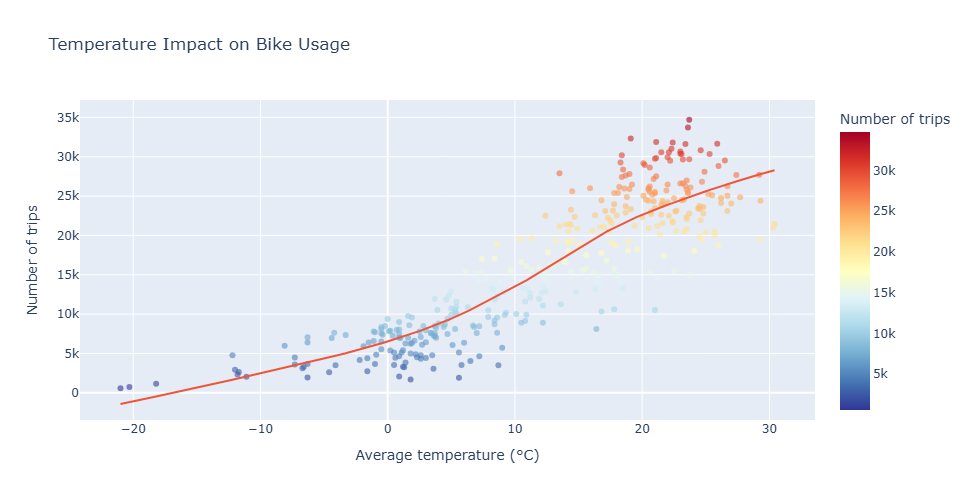


Temperature × Usage correlation: 0.872


In [46]:
# Scatter plot: Température vs Usage
fig = px.scatter(df_merged, x='tavg', y='trip_count',
                 title='Temperature Impact on Bike Usage',
                 labels={'tavg': 'Average temperature (°C)', 
                        'trip_count': 'Number of trips'},
                 trendline='lowess',
                 opacity=0.6,
                 color='trip_count',
                 color_continuous_scale='RdYlBu_r')

fig.update_layout(height=500)
fig.show()

# Corrélation
if 'tavg' in df_merged.columns:
    corr_temp = df_merged[['tavg', 'trip_count']].corr().iloc[0, 1]
    print(f"\nTemperature × Usage correlation: {corr_temp:.3f}")

### 3.2 Precipitation Impact

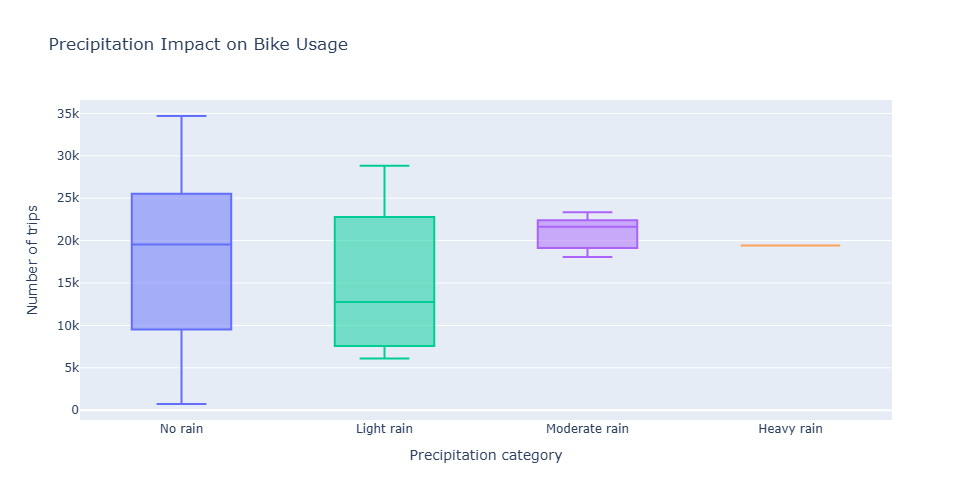


Average trips by category:
rain_category
No rain          18043.0
Light rain       15220.0
Moderate rain    20920.0
Heavy rain       19436.0
Name: trip_count, dtype: float64


In [47]:
# Catégoriser les précipitations
if 'prcp' in df_merged.columns:
    df_merged['rain_category'] = pd.cut(
        df_merged['prcp'],
        bins=[-0.1, 0, 5, 15, 100],
        labels=['No rain', 'Light rain', 'Moderate rain', 'Heavy rain']
    )
    
    # Box plot par catégorie
    fig = px.box(df_merged, x='rain_category', y='trip_count',
                 title='Precipitation Impact on Bike Usage',
                 labels={'rain_category': 'Precipitation category', 
                        'trip_count': 'Number of trips'},
                 color='rain_category')
    
    fig.update_layout(height=500, showlegend=False)
    fig.show()
    
    # Stats
    print("\nAverage trips by category:")
    print(df_merged.groupby('rain_category')['trip_count'].mean().round(0))

### 3.3 Weather Correlation Matrix

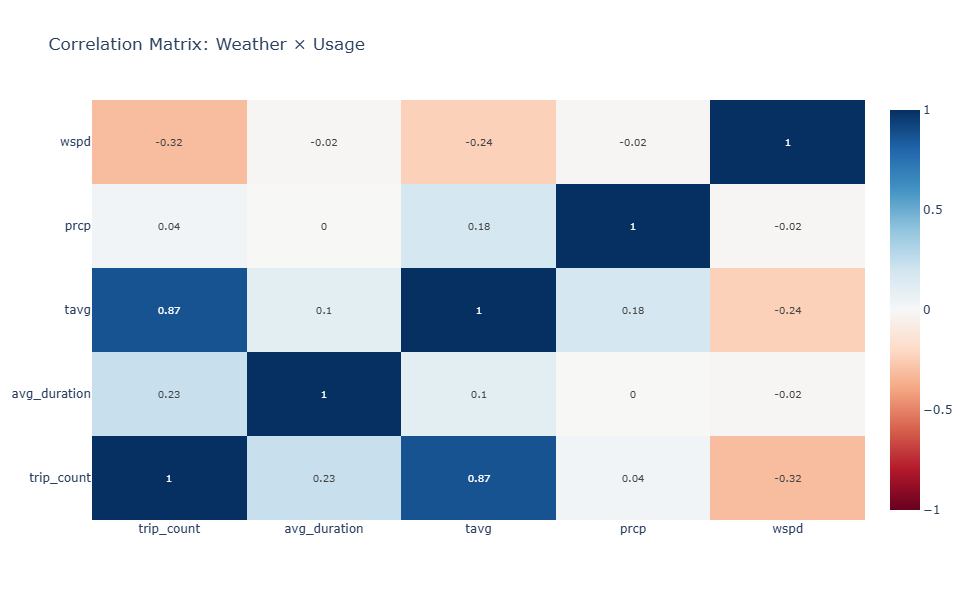

In [48]:
# Sélection des variables météo numériques
weather_cols = [col for col in df_merged.columns if col not in ['date', 'rain_category']]
numeric_cols = df_merged[weather_cols].select_dtypes(include=[np.number]).columns.tolist()

# Garder seulement trip_count et les variables météo principales
corr_cols = ['trip_count', 'avg_duration']
for col in numeric_cols:
    if any(keyword in col.lower() for keyword in ['tavg', 'prcp', 'wspd']):
        corr_cols.append(col)

# Matrice de corrélation
corr_matrix = df_merged[corr_cols].corr()

# Heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=corr_matrix.values.round(2),
    texttemplate='%{text}',
    textfont={"size": 10},
    hovertemplate='%{x} × %{y}<br>Correlation: %{z:.3f}<extra></extra>'
))

fig.update_layout(
    title='Correlation Matrix: Weather × Usage',
    height=600,
    width=800
)

fig.show()

### 3.4 Timeline: Usage vs Weather

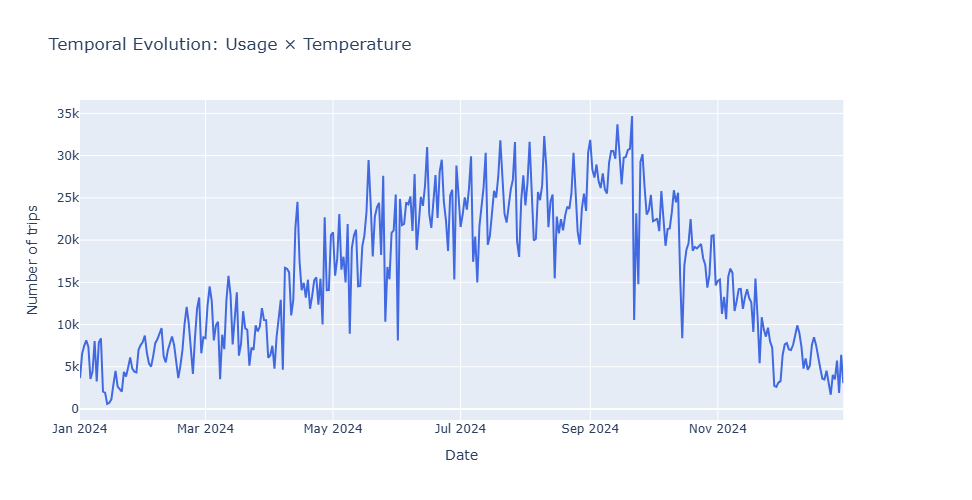

In [49]:
# Graphique à double axe
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Trajets
fig.add_trace(
    go.Scatter(x=df_merged['date'], y=df_merged['trip_count'],
               name="Number of trips",
               line=dict(color='royalblue', width=2)),
    secondary_y=False
)

# Température
if 'temperature_2m_mean' in df_merged.columns:
    fig.add_trace(
        go.Scatter(x=df_merged['date'], y=df_merged['temperature_2m_mean'],
                   name="Temperature (°C)",
                   line=dict(color='orangered', width=2, dash='dash')),
        secondary_y=True
    )

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Number of trips", secondary_y=False)
fig.update_yaxes(title_text="Temperature (°C)", secondary_y=True)

fig.update_layout(
    title='Temporal Evolution: Usage × Temperature',
    height=500,
    hovermode='x unified'
)

fig.show()

---

## 4. Holiday and Special Events Impact

Analysons l'impact des jours fériés et événements spéciaux sur l'utilisation.

In [50]:
# Préparer les dates de jours fériés
df_holidays_2024['date'] = pd.to_datetime(df_holidays_2024['date']).dt.date
holiday_dates = df_holidays_2024['date'].tolist()

# Marquer les jours fériés dans df_merged
df_merged['is_holiday'] = df_merged['date'].isin(holiday_dates).astype(int)

# Stats
print("Comparison: Holidays vs Regular days")
print("\nHolidays:")
print(f"  Average trips: {df_merged[df_merged['is_holiday']==1]['trip_count'].mean():.0f}")
print(f"  Average duration: {df_merged[df_merged['is_holiday']==1]['avg_duration'].mean():.1f} min")

print("\nRegular days:")
print(f"  Average trips: {df_merged[df_merged['is_holiday']==0]['trip_count'].mean():.0f}")
print(f"  Average duration: {df_merged[df_merged['is_holiday']==0]['avg_duration'].mean():.1f} min")

Comparison: Holidays vs Regular days

Holidays:
  Average trips: 12924
  Average duration: 22.3 min

Regular days:
  Average trips: 16108
  Average duration: 16.4 min


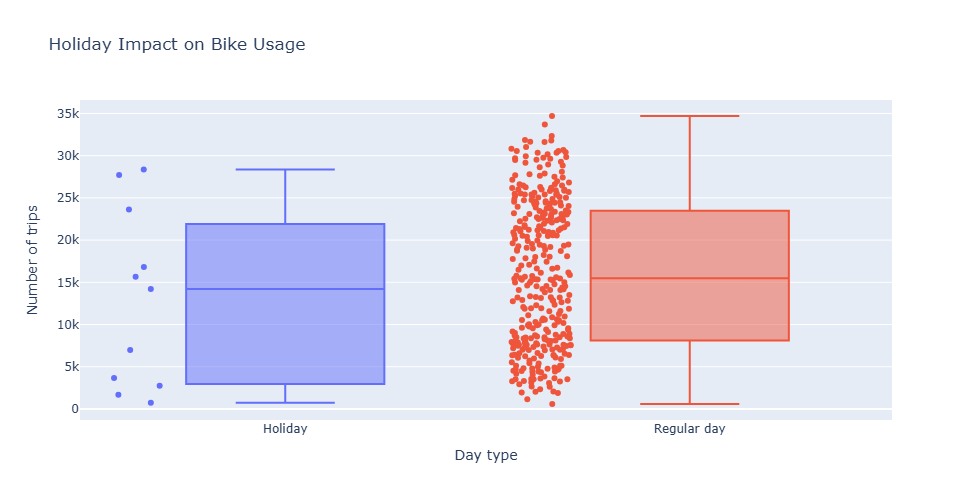

In [51]:
# Visualisation: Box plot comparatif
df_merged['day_type_full'] = df_merged['is_holiday'].map({0: 'Regular day', 1: 'Holiday'})

fig = px.box(df_merged, x='day_type_full', y='trip_count',
             title='Holiday Impact on Bike Usage',
             labels={'day_type_full': 'Day type', 'trip_count': 'Number of trips'},
             color='day_type_full',
             points='all')

fig.update_layout(height=500, showlegend=False)
fig.show()

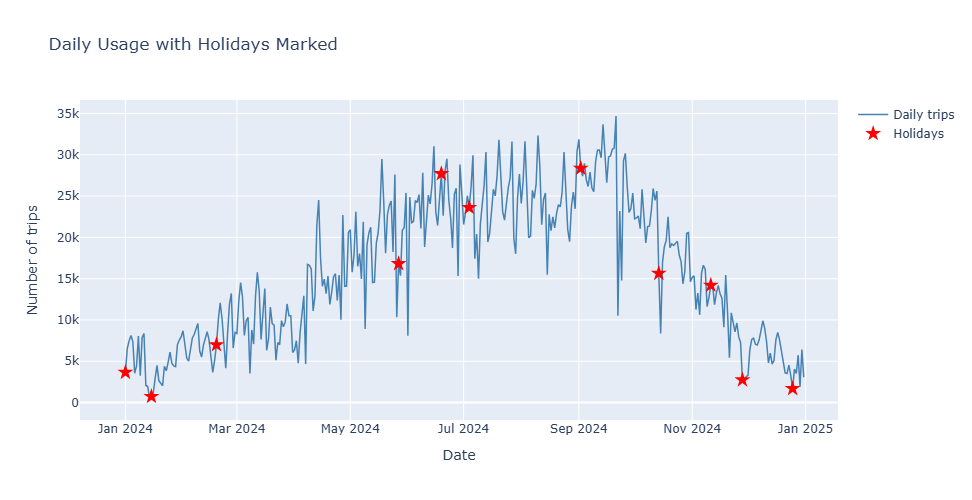

In [52]:
# Timeline avec marqueurs de jours fériés
fig = go.Figure()

# Ligne des trajets
fig.add_trace(go.Scatter(
    x=df_merged['date'],
    y=df_merged['trip_count'],
    mode='lines',
    name='Daily trips',
    line=dict(color='steelblue', width=1.5)
))

# Marqueurs pour les jours fériés
holidays_data = df_merged[df_merged['is_holiday'] == 1]
fig.add_trace(go.Scatter(
    x=holidays_data['date'],
    y=holidays_data['trip_count'],
    mode='markers',
    name='Holidays',
    marker=dict(size=12, color='red', symbol='star')
))

fig.update_layout(
    title='Daily Usage with Holidays Marked',
    xaxis_title='Date',
    yaxis_title='Number of trips',
    height=500,
    hovermode='x unified'
)

fig.show()

---

## 5. Data Quality Assessment

Vérifions la qualité des données et identifions les problèmes potentiels.

### 5.1 Trip Duration - Outlier Detection

In [54]:
# Distribution des durées de trajet
print("Trip duration statistics:")
print(df_divvy['trip_duration_min'].describe())

# Identifier les valeurs aberrantes
negative_duration = (df_divvy['trip_duration_min'] < 0).sum()
very_short = (df_divvy['trip_duration_min'] < 1).sum()
very_long = (df_divvy['trip_duration_min'] > 1440).sum()  # > 24h

print(f"\nProblems detected:")
print(f"  Negative durations: {negative_duration:,} ({negative_duration/len(df_divvy)*100:.2f}%)")
print(f"  Very short (<1 min): {very_short:,} ({very_short/len(df_divvy)*100:.2f}%)")
print(f"  Very long (>24h): {very_long:,} ({very_long/len(df_divvy)*100:.2f}%)")

Trip duration statistics:
count    5.860568e+06
mean     1.731558e+01
std      6.160261e+01
min     -2.748317e+03
25%      5.545096e+00
50%      9.716667e+00
75%      1.725002e+01
max      1.559933e+03
Name: trip_duration_min, dtype: float64

Problems detected:
  Negative durations: 227 (0.00%)
  Very short (<1 min): 131,530 (2.24%)
  Very long (>24h): 7,596 (0.13%)


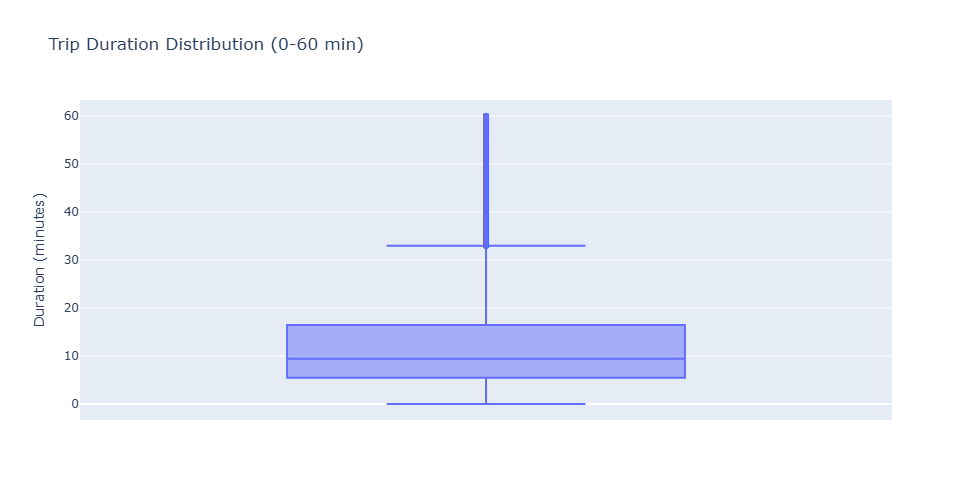

In [55]:
# Box plot des durées (filtré pour meilleure visibilité)
df_filtered = df_divvy[(df_divvy['trip_duration_min'] > 0) & 
                       (df_divvy['trip_duration_min'] < 60)].sample(min(100000, len(df_divvy)))

fig = px.box(df_filtered, y='trip_duration_min',
             title='Trip Duration Distribution (0-60 min)',
             labels={'trip_duration_min': 'Duration (minutes)'})

fig.update_layout(height=500)
fig.show()

### 5.2 Most Popular Stations

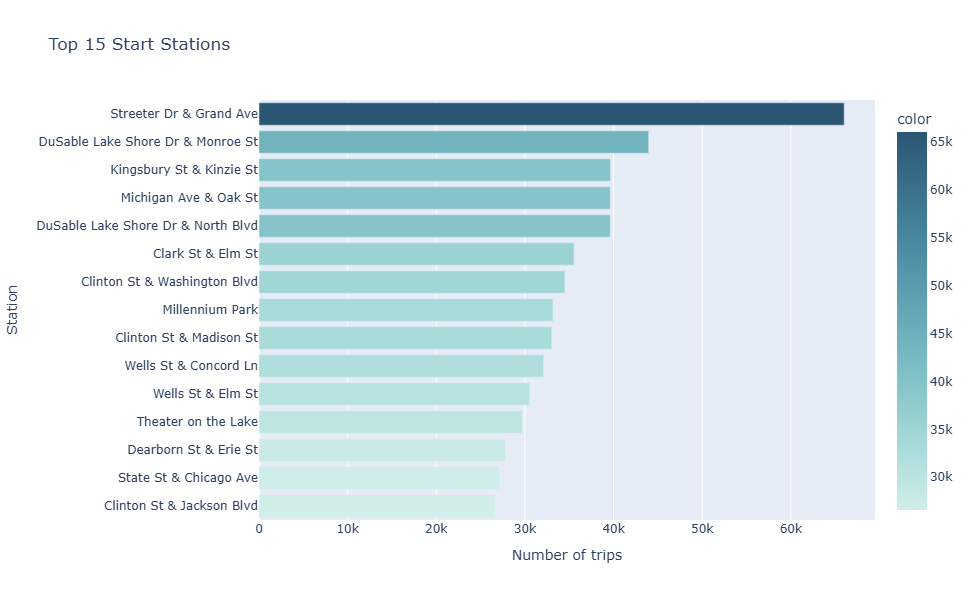

In [56]:
# Top stations de départ
if 'start_station_name' in df_divvy.columns:
    top_start = df_divvy['start_station_name'].value_counts().head(15)
    
    fig = px.bar(x=top_start.values, y=top_start.index, orientation='h',
                 title='Top 15 Start Stations',
                 labels={'x': 'Number of trips', 'y': 'Station'},
                 color=top_start.values,
                 color_continuous_scale='Teal')
    
    fig.update_layout(height=600, showlegend=False, yaxis={'categoryorder': 'total ascending'})
    fig.show()

### 5.3 Bike Types

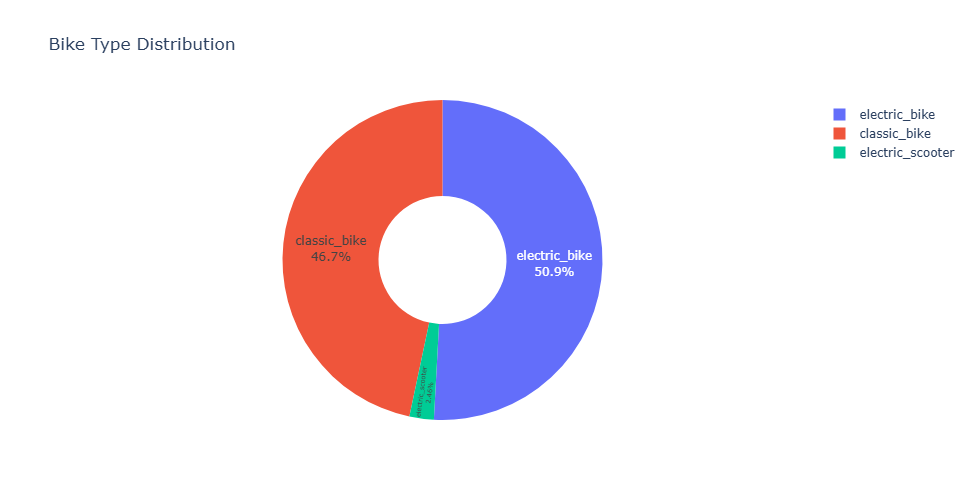


Statistics by type:
rideable_type
electric_bike       2980595
classic_bike        2735636
electric_scooter     144337
Name: count, dtype: int64


In [57]:
# Distribution par type de vélo
if 'rideable_type' in df_divvy.columns:
    bike_types = df_divvy['rideable_type'].value_counts()
    
    fig = px.pie(values=bike_types.values, names=bike_types.index,
                 title='Bike Type Distribution',
                 hole=0.4)
    
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(height=500)
    fig.show()
    
    print("\nStatistics by type:")
    print(bike_types)

### 5.4 User Types

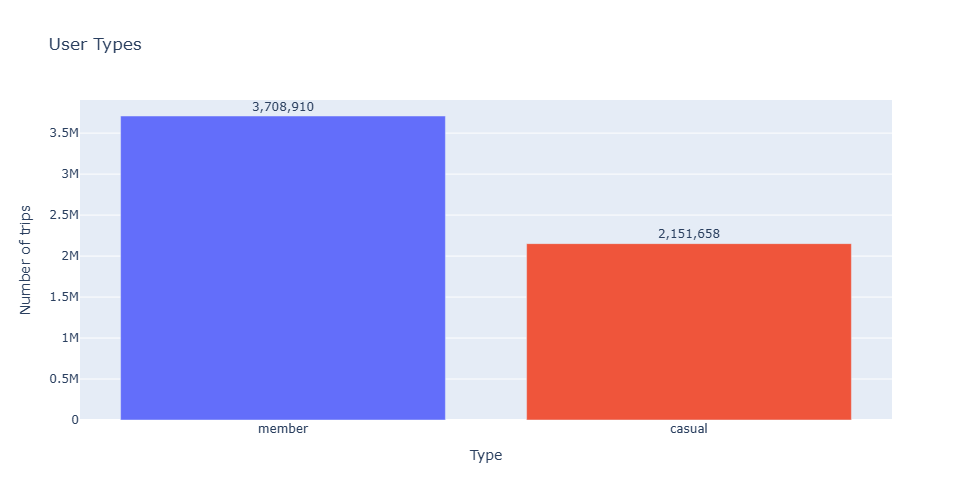


Distribution:
  member: 3,708,910 (63.3%)
  casual: 2,151,658 (36.7%)


In [58]:
# Distribution par type de membre
if 'member_casual' in df_divvy.columns:
    member_types = df_divvy['member_casual'].value_counts()
    
    fig = px.bar(x=member_types.index, y=member_types.values,
                 title='User Types',
                 labels={'x': 'Type', 'y': 'Number of trips'},
                 color=member_types.index,
                 text=member_types.values)
    
    fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig.update_layout(height=500, showlegend=False)
    fig.show()
    
    print("\nDistribution:")
    for member_type, count in member_types.items():
        print(f"  {member_type}: {count:,} ({count/len(df_divvy)*100:.1f}%)")

### 5.5 Data Quality Summary

In [59]:
# Rapport de qualité complet
print("="*80)
print("DATA QUALITY SUMMARY")
print("="*80)

print(f"\nDivvy 2024 Dataset:")
print(f"   Total trips: {len(df_divvy):,}")
print(f"   Period: {df_divvy['started_at'].min()} → {df_divvy['started_at'].max()}")
print(f"   Columns: {df_divvy.shape[1]}")

print(f"\nMissing values:")
missing_summary = df_divvy.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
if len(missing_summary) > 0:
    for col, count in missing_summary.items():
        print(f"   {col}: {count:,} ({count/len(df_divvy)*100:.2f}%)")
else:
    print("   No missing values detected!")

print(f"\nRecommended cleaning actions:")
print("   1. Filter negative or extreme durations")
print("   2. Handle missing values for start/end station names")
print("   3. Verify GPS coordinates consistency")
print("   4. Standardize datetime formats")

print("\n" + "="*80)

DATA QUALITY SUMMARY

Divvy 2024 Dataset:
   Total trips: 5,860,568
   Period: 2024-01-01 00:00:39 → 2024-12-31 23:56:49.854000
   Columns: 21

Missing values:
   end_station_id: 1,104,653 (18.85%)
   end_station_name: 1,104,653 (18.85%)
   start_station_id: 1,073,951 (18.33%)
   start_station_name: 1,073,951 (18.33%)
   end_lat: 7,232 (0.12%)
   end_lng: 7,232 (0.12%)

Recommended cleaning actions:
   1. Filter negative or extreme durations
   2. Handle missing values for start/end station names
   3. Verify GPS coordinates consistency
   4. Standardize datetime formats



---

## 6. Key Findings and Next Steps

### Key Findings

#### Temporal Patterns:
- **Peak hours**: 7-9 AM and 4-6 PM (commuting patterns)
- **Weekday vs weekend**: More pronounced peaks on weekdays, distributed usage on weekends
- **Strong seasonality**: Maximum in summer, minimum in winter

#### Weather Impact:
- **Temperature**: Strong positive correlation with usage
- **Precipitation**: Significant negative impact
- **Comfort zone**: Optimal usage between 15-25°C

#### Holidays:
- Usage generally reduced on holidays
- Different patterns by holiday type (summer vs winter)

#### Data Quality:
- Generally clean dataset (~5.8M trips)
- Some outliers to filter (negative/extreme durations)
- Missing values on some stations

---

In [60]:
# Sauvegarder le dataset mergé pour le prochain notebook
output_path = DATA_PATH / 'processed'
output_path.mkdir(exist_ok=True)

df_merged.to_csv(output_path / 'daily_data_with_weather.csv', index=False)
print(f"Dataset saved: {output_path / 'daily_data_with_weather.csv'}")
print(f"   Shape: {df_merged.shape}")
print(f"   Size: {(output_path / 'daily_data_with_weather.csv').stat().st_size / 1024:.2f} KB")

Dataset saved: ..\data\processed\daily_data_with_weather.csv
   Shape: (366, 17)
   Size: 35.44 KB


---

## EDA Completed

**Date:** 2026-01-13  
**Status:** Completed  
**Next:** Feature Engineering

---